In [1]:
import torchvision
import fastai

In [2]:
from fastai.vision import *
import torch.nn.functional as F
from fastai.layers import *

In [3]:
%matplotlib inline

In [1]:
def get_cifar():
    trainset = torchvision.datasets.CIFAR10('datasets', train=True, download=False)
    testset = torchvision.datasets.CIFAR10('datasets', train=False, download=False)
    data = DataBunch.create(train_ds=trainset, valid_ds=testset)
    for num, (img, label) in enumerate(train_ds):
        name = f"datasets/train/class{label}/{num}.png"
        img.save(name, format='png')

In [6]:
data = ImageDataBunch.from_folder('datasets')

In [7]:
img, label = data.valid_ds[0]
label

Category class0

In [4]:
m = models.Darknet([1], num_classes=10, nf=16)

In [8]:
learn = Learner(data, m, metrics=[accuracy])

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-02


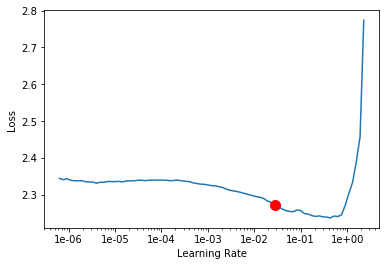

In [10]:
learn.recorder.plot()

In [11]:
epochs = 15
lr = 2.75e-3
learn.fit_one_cycle(epochs, lr)

epoch,train_loss,valid_loss,accuracy


KeyboardInterrupt: 

In [48]:
learn.save("darknet_cifar", with_opt=False)

In [12]:
bs=256
sz=32
tfms = get_transforms(max_rotate=0.0, max_warp=0.0)

In [15]:
data = ImageDataBunch.from_folder('datasets', ds_tfms=tfms, bs=bs)

In [16]:
learn = Learner(data, m, metrics=[accuracy])
#learn.load("darknet_cifar")

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.98E-02


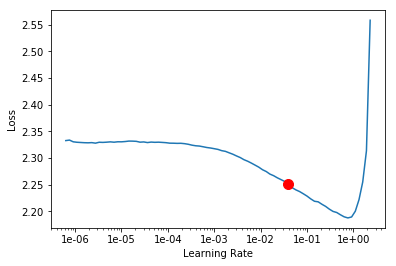

In [18]:
learn.recorder.plot()

In [19]:
epochs = 15
lr = 4e-2
learn.fit_one_cycle(epochs, lr)

epoch,train_loss,valid_loss,accuracy
1,1.759660,1.835423,0.313600
2,1.547081,1.711163,0.386400
3,1.406540,2.283486,0.339300
4,1.329572,1.573021,0.434700
5,1.276289,1.900391,0.389500
6,1.195086,1.853138,0.407500
7,1.160217,1.791380,0.420500
8,1.123022,1.383110,0.526900
9,1.072460,1.190489,0.573700
10,1.049946,1.185175,0.589100


In [20]:
learn.save("darknet_cifar_tiny", with_opt=False)